In [1]:
import imbens

In [2]:
from collections import Counter
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imbens.ensemble.base import sort_dict_by_key

In [3]:
import matplotlib.pyplot as plt
from imbens.utils._plot import plot_2Dprojection_and_cardinality

RANDOM_STATE = 42

In [4]:
X, y = make_classification(
    n_classes=3,
    n_samples=2000,
    class_sep=2,
    weights=[0.1, 0.3, 0.6],
    n_informative=3,
    n_redundant=1,
    flip_y=0,
    n_features=20,
    n_clusters_per_class=2,
    random_state=RANDOM_STATE,
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=RANDOM_STATE
)

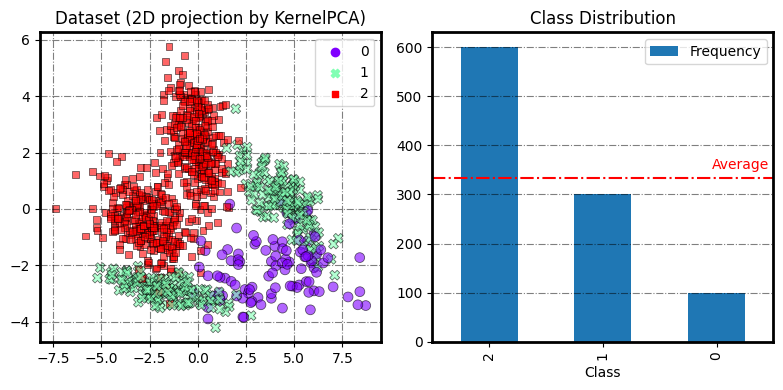

In [5]:
fig = plot_2Dprojection_and_cardinality(X_train, y_train, figsize=(8, 4))
plt.show()

In [6]:
clf = imbens.ensemble.SelfPacedEnsembleClassifier(random_state=RANDOM_STATE)

In [7]:
clf.fit(X_train, y_train)

SelfPacedEnsembleClassifier(random_state=RandomState(MT19937) at 0x16CC64D40)

In [8]:
y_pred_proba = clf.predict_proba(X_valid)
y_pred = clf.predict(X_valid)

In [10]:
balanced_acc_score = sklearn.metrics.balanced_accuracy_score(y_valid, y_pred)
print(f'SPE: ensemble of {clf.n_estimators} {clf.estimator_}')
print('Validation Balanced Accuracy: {:.3f}'.format(balanced_acc_score))

SPE: ensemble of 50 DecisionTreeClassifier()
Validation Balanced Accuracy: 0.980
